In [ ]:
import random as rand
import matplotlib.pyplot as plt
import numpy as np
import math as mt

#para agregar formato a los plt
plt.style.use('seaborn-white')

# Funciones implementadas

 

*   **Probabilitydis** es una función encargada de tomar un mazo y verificar si se logra o no una 21
*   **HalfDeck** toma un mazo y agrega cartas aletaroeamente hasta tener medio mazo con un máximo de tres 5s y de dos 7s

*   **ProbabilityHalfDeck** me dice la probabilidad de lograr 21 con una mano [7,7,5]

*   **analityc** nos dice la probabilidad sumada de sacar 21 en dos casos: cuando se saca primero un 2 y cuando se saca primero un 1

*   **reminingdeck** recibe 4 parametros:

  1.   El deck del que va a seleccionar las cartas
  2.   El nuevo deck
  3.   El tamaño del nuevo deck
  4.   Este parametro se ingresa en float y representa un porcentaje, el porcentaje lo decide el usuario creando un Hot deck o un Cool deck


*   **gamewinnin** retorna:

  1.   True: si se logra una 21
  2.   False: si no

    esto con base en la mano [7,7,5]


*   **ColdGame** retorna:
  1.   True: si ganó con un mazo frío
  2.   False: si perdió con un mazo frío















In [ ]:
def Probabilitydis(deck, count, taken):
  hand = []
  cards = 0
  while (True):
    card = rand.choice(deck)
    deck.remove(card)
    hand.append(card)
    cards += 1
    if (sum(hand) >= 21):
      if (sum(hand) == 21):
        count += 1
        taken.append(cards)
      break
  return count

In [ ]:
def HalfDeck(deck, halfdeck):
  pick_5 = 0 #maximo 3
  pick_7 = 0 #maximo 2
  half = len(deck)/2
 
  while (len(halfdeck) < half):
    card = rand.choice(deck)
    deck.remove(card)
    if (card == 5 and pick_5 <= 2):
      pick_5 += 1
      halfdeck.append(card)
    elif (card == 7 and pick_7 <= 1):
      pick_7 +=1
      halfdeck.append(card)
    elif (card != 5 and card != 7):
      halfdeck.append(card)

In [ ]:
def ProbabilitydisHalf(deck, count, taken):
  hand = [7,7,5]
  cards = 0
  while (True):
    card = rand.choice(deck)
    deck.remove(card)
    hand.append(card)
    cards += 1
    if (sum(hand) >= 21):
      if (sum(hand) == 21):
        count += 1
        taken.append(cards)
      break
  return count

In [ ]:
def analytic(deckwin):
  deck = np.array(deckwin)
  num_1 = deck[deck == 1].size
  num_2 = deck[deck == 2].size
  if (num_1 < 2):
    return num_2 / deck.size
  return (num_2 / deck.size) + ((num_1 / deck.size)*((num_1 - 1)/(deck.size - 1)))

In [ ]:
def reminingdeck(deck, remining, size, hotorcold):
  deck12 = [1,1,1,1,2,2,2,2]
  winnincards = int(size * hotorcold)
  percentil = mt.ceil((8/size))
  if (hotorcold <= percentil):
    for i in range(winnincards):
      card = rand.choice(deck12)
      deck12.remove(card)
      remining.append(card)

    while (len(remining) < size):
      card = rand.choice(deck)
      deck.remove(card)
      if (card != 1 and card != 2):
        remining.append(card)
  else:
    print("no es posible tener una 21 de esa probabilidad con las cartas restantes")

In [ ]:
def gamewinnin(deck, taken):
  hand = [7,7,5]
  cards = 0
  while (True):
    card = rand.choice(deck)
    deck.remove(card)
    hand.append(card)
    cards += 1
    if (sum(hand) >= 21):
      if (sum(hand) == 21):
        taken.append(cards)
        return True
      break
  return False

In [ ]:
def ColdGame(deck, taken):
  hand = []
  cards = 0
  while (True):
    card = rand.choice(deck)
    deck.remove(card)
    hand.append(card)
    cards += 1
    if (sum(hand) >= 21):
      if (sum(hand) == 21):
        taken.append(cards)
        return True
      break
  return False

#Punto 1
Calculate the probability of getting a 21 drawing cards sequentially from shuffled Spanish 48-deck with card values [1,2,3,4,5,6,7,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12] and from a shuffled Poker 52-card with card values [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]. Plot the experimental distribution of the numbers of card requires to complete 21 in 10000 trials.



*   A n-card deck is shuffled if t all possible n! decks have equal probability 1/n! or equivalently if when choosing any card of the shuffled deck all n cards have the same probability 1/n of appearing.
*   Hint: Instead of shuffling the card deck an drawing sequentially it is equivalent to have a sorted list representing the cards and draw cards randomly located from that list with random.choice(list).



Probabilidad Baraja Española:  0.1519
Probabilidad Poker 52 cartas: 0.1443


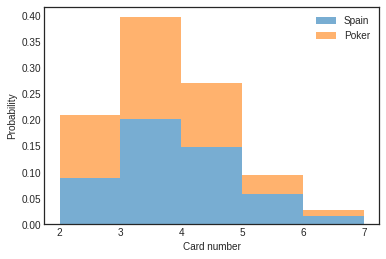

In [ ]:
#Punto1
pruebas = 10000

count_spain = 0                   # Variable para guardar el numero de victorias con el mazo Español
count_poker = 0                   # Variable para guardar el numero de victorias con el mazo de Poker
taken_cards1 = []                 # Cantidad de cartas tomadas para llegar a 21 (Mazo Español)
taken_cards2 = []                 # Cantidad de cartas tomadas para llegar a 21 (Mazo de Poker)

# Simulacion de las 10000 pruebas
for i in range(pruebas):
  spain_48deck = [1,2,3,4,5,6,7,8,9,10,11,12] * 4
  count_spain = Probabilitydis(spain_48deck, count_spain, taken_cards1)
  poker_52deck = [1,2,3,4,5,6,7,8,9,10,11,12,13] * 4
  count_poker = Probabilitydis(poker_52deck, count_poker, taken_cards2)

print("Probabilidad Baraja Española: ", count_spain/pruebas)
print("Probabilidad Poker 52 cartas:", count_poker/pruebas)

# Graficación en forma de histograma de las cartas necesarias para llegar a completar una 21
bins_set = list (set (taken_cards1).union(set (taken_cards2)))
plt.hist([taken_cards1,taken_cards2], bins= bins_set,  density=True, stacked=True, alpha=0.6, label=['Spain', 'Poker'])
plt.xlabel('Card number')
plt.ylabel('Probability')
plt.legend(loc='upper right')

# Punto 2

Calculate the probability of getting a 21 drawing cards sequentially from shuffled Spanish 48-deck with card values are [1,2,3,4,5,6,7,8,9,,10,10,10,1,2,3,4,5,6,7,8,9,,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,,10,10,10] and [1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10] for the Spanish and Poker card decks. Plot the experimental distribution of the numbers of card requires to complete 21 in 10000 simulations.

Probabilidad Mazo Española 48 cartas:  0.1555
Probabilidad Mazo Poker 52 cartas: 0.1406


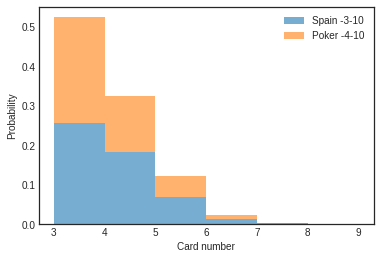

In [ ]:
#Punto2
count_spain = 0                   # Variable para guardar el numero de victorias con el mazo Español
count_poker = 0                   # Variable para guardar el numero de victorias con el mazo de Poker
taken_cards1 = []                 # Cantidad de cartas tomadas para llegar a 21 (Mazo Español)
taken_cards2 = []                 # Cantidad de cartas tomadas para llegar a 21 (Mazo de Poker)

# Simulacion de las 10000 pruebas
for i in range(pruebas):  
  spain_48deck = [1,2,3,4,5,6,7,8,9,10,10,10] * 4
  count_spain = Probabilitydis(spain_48deck, count_spain, taken_cards1)

  poker_52deck = [1,2,3,4,5,6,7,8,9,10,10,10,10] * 4
  count_poker = Probabilitydis(poker_52deck, count_poker, taken_cards2)

print("Probabilidad Mazo Española 48 cartas: ", count_spain/pruebas)
print("Probabilidad Mazo Poker 52 cartas:", count_poker/pruebas)

# Graficación en forma de histograma de las cartas necesarias para llegar a completar una 21
bins_set = list (set (taken_cards1).union(set (taken_cards2)))
plt.hist([taken_cards1,taken_cards2], bins= bins_set,  density=True, stacked=True, alpha=0.6,label=['Spain -3-10', 'Poker -4-10'])
plt.xticks(ticks=bins_set)
plt.xlabel('Card number')
plt.ylabel('Probability')
plt.legend(loc='upper right')

# Punto 3

Calculate the probability of getting a 21, with the Spanish and Poker card deck, assuming that you are in the middle of game and the remaining deck has n/2 card and you have the cards [7,7,5]. You pick arbitrary what card are in the remaining deck with the only restriction that there are be maximum two 7s and three 5s). Plot the experimental distribution of the numbers of card requires to complete 21 in 10000 simulations.

Probabilidad Baraja Española:  0.0889
Probabilidad Baraja Poker:  0.0829


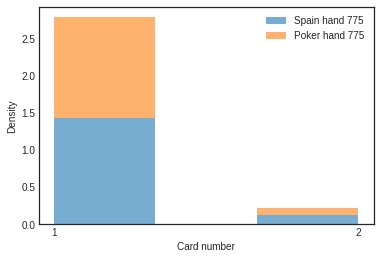

In [ ]:
#Punto 3
spain_halfDeck = []                   # Variable que almacena la mitad de cartas seleccionadas aleatoreamente del Mazo Español
poker_halfDeck = []                   # Variable que almacena la mitad de cartas seleccionadas aleatoreamente del Mazo de Poker
count_spain, count_poker = 0, 0       # Variable donde se guarda el numero de victorias para el mazo correspondiente
taken_cards1 = []                     # Cantidad de cartas tomadas para llegar a 21 (Mazo Español)
taken_cards2 = []                     # Cantidad de cartas tomadas para llegar a 21 (Mazo de Poker)

# Simulacion de las 10000 pruebas
for i in range(pruebas):
  spain_48deck = [1,2,3,4,5,6,7,8,9,10,10,10] * 4
  poker_52deck = [1,2,3,4,5,6,7,8,9,10,10,10,10] * 4

  # Particion del Mazo aletaorea
  HalfDeck(spain_48deck, spain_halfDeck)
  HalfDeck(poker_52deck, poker_halfDeck)
  
  count_spain = ProbabilitydisHalf(spain_halfDeck, count_spain, taken_cards1)
  count_poker = ProbabilitydisHalf(poker_halfDeck, count_poker, taken_cards2)

print("Probabilidad Baraja Española: ",count_spain/pruebas)
print("Probabilidad Baraja Poker: ", count_poker/pruebas)

# Graficación en forma de histograma de las cartas necesarias para llegar a completar una 21
bins_set = list (set (taken_cards1).union(set (taken_cards2)))
plt.hist([taken_cards1,taken_cards2], bins=3, stacked=True, density=True, alpha=0.6, label=['Spain hand 775', 'Poker hand 775'])
plt.xlabel('Card number')
plt.ylabel('Density')
plt.xticks(ticks=[1,2])
plt.legend(loc='upper right')


# Punto 4
Find remaining decks for Spanish and Poker card decks, with the number of cards according to the list below, with highest (hot deck) and lowest (cold deck) probabilities of getting 21 assuming that you have cards [7,7,5]. calculate the probabilities analytically and verify them with Montecarlo. Plot the experimental distribution of the numbers of card requires to complete 21 in 10000 simulations.

Remining cards size (10 or 12): 12
Hot or Cold in a floating number
Hot or Cold: 0.6
Analytic probability Spain Deck: 0.75 	Probability Montecarlo Spain:  0.7551
Analytic probability Poker Deck: 0.75 	Probability Montecarlo Spain:  0.753


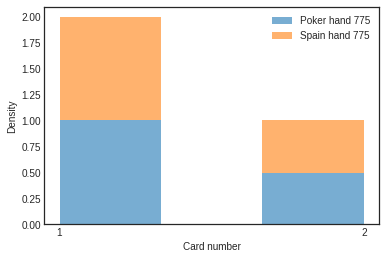

In [ ]:
#Punto 4
taken_spain, taken_poker = [], []                           # Variables para el almacenamiento de la cantidad de cartas necesarias para conseguir 21 
deck_s, deck_p = [], []                                     # Variables para almacenar el mazo restande ya sea de 12 o 10 cartas
count_spain, count_poker = 0, 0                             # Variables donde se lleva la cuenta de las victorias para el mazo respectivo
analytic_spain, analytic_poker = 0, 0                       # Variables donde se alacenara el valor de la probabilidad calculada analiticamente

# Lectura de los datos para la simulacion 
size = int(input("Remining cards size (10 or 12): "))       # Tamaño del Mazo restante ya sea de 10 o 12 cartas
print("Hot or Cold in a floating number")
perc = float(input("Hot or Cold: "))                        # Indica si sera un mazo Hot o Cold (Ingresa un valor flotante)

# Simulacion de las 10000 pruebas
for i in range(pruebas):
  spain_48deck = [1,2,3,4,5,6,7,8,9,10,10,10] * 4
  poker_52deck = [1,2,3,4,5,6,7,8,9,10,10,10,10] * 4
  reminingdeck(spain_48deck, deck_s, size, perc)
  reminingdeck(poker_52deck, deck_p, size, perc)
  
# Calculo de la probabilidad analitica para cada mazo
  analytic_spain += analytic(deck_s)
  analytic_poker += analytic(deck_p)
  
  count_poker = ProbabilitydisHalf(deck_p, count_poker, taken_poker)
  count_spain = ProbabilitydisHalf(deck_s, count_spain, taken_spain)
 
print('Analytic probability Spain Deck: {:.2}'.format(analytic_spain/pruebas), '\tProbability Montecarlo Spain: ', count_spain/pruebas)
print('Analytic probability Poker Deck: {:.2}'.format(analytic_poker/pruebas), '\tProbability Montecarlo Spain: ', count_poker/pruebas)

# Graficación en forma de histograma de las cartas necesarias para llegar a completar una 21
plt.hist([taken_poker, taken_spain], bins=3, density=True, stacked=True, alpha=0.6, label=['Poker hand 775', 'Spain hand 775'])
plt.xlabel('Card number')
plt.ylabel('Probability')
plt.ylabel('Density')
plt.xticks(ticks=[1,2])
plt.legend(loc='upper right')

# Punto 5

If Ben goes to Vegas every weekend (Friday, Saturday and Sunday), plays every weekend day 10 hours, each game takes 3 mins. He gets the cards [7,7,5] and a remaining hot deck with probability 1/10, the cards in hot deck are the ones obtained in the previous quiz point 4. Asume that for cold decks the Ben has no cards and the remaining deck is the complete deck. He bets $1000 on hot decks and $10 on cold decks. What is the estimated amount of money that Ben wins or losses on a weekend estimated with 10 million simulations using both the Spanish and Poker card decks? Plot the experimental distribution of the numbers of card requires to complete 21 in 10000 simulations.

Ganancias o perdidas mazo Español:  211463080
Ganancias o perdidas mazo Poker: 100596620


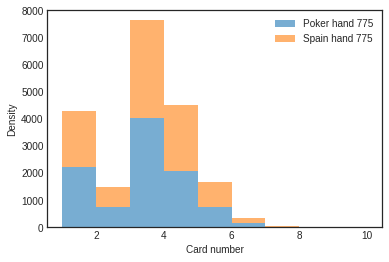

In [ ]:
#con 10millones de simulaciones, cuanto dinero gana o pierde Ben
#Con 10mil simulaciones plotear 21s
bets_s, bets_p = 0, 0
taken_poker, taken_spain = [], []

for i in range(600000000):
  var_hot_deck = rand.randint(1,10)
  spain_48deck = [1,2,3,4,5,6,7,8,9,10,10,10] * 4
  poker_52deck = [1,2,3,4,5,6,7,8,9,10,10,10,10] * 4
  deck_s, deck_p = [], []
  if(var_hot_deck == 1):
    hand_s, hand_p = [7,7,5], [7,7,5]
    reminingdeck(spain_48deck, deck_s, 10, 0.8)
    reminingdeck(poker_52deck, deck_p, 10, 0.8)
    if (gamewinnin(deck_s, taken_spain)):
      bets_s += 1000
    else:
      bets_s -= 1000

    if (gamewinnin(deck_p, taken_poker)):
      bets_p += 1000
    else:
      bets_p -= 1000
    
  else:
    if (ColdGame(spain_48deck, taken_spain)):
      bets_s += 10
    else:
      bets_s -= 10
    if (ColdGame(poker_52deck, taken_poker)):
      bets_p += 10
    else:
      bets_p -= 10



print('Ganancias o perdidas mazo Español: ', bets_s)
print('Ganancias o perdidas mazo Poker:', bets_p)

bins_set = list (set (taken_spain).union(set (taken_poker)))
plt.hist([taken_poker[0:10000], taken_spain[0:10000]], bins = bins_set, stacked=True, alpha=0.6, label=['Poker hand 775', 'Spain hand 775'])
plt.xlabel('Card number')
plt.ylabel('Probability')
plt.ylabel('Density')
plt.legend(loc='upper right')


# Punto 6

Extra credit (one class participation) . Calculate the probabilities of having the cards [7,7,5] and a remaining hot deck with 12,10 and 8 cards. Calculate the estimated amount of money that Ben wins or losses on a weekend estimated with 10 million simulations with these probabilities and the same assumptions in previous quiz point 5 and using both the Spanish and Poker card decks.

In [ ]:
deck_s, deck_p = [], []
taken_spain, taken_poker = [], []
bet_s12, bet_p12, bet_s10, bet_p10, bet_s8, bet_p8 = 0, 0, 0, 0, 0, 0
count_s12, count_p12, count_s10, count_p10, count_s8, count_p8 = 0, 0, 0, 0, 0, 0
listnum = [12,10,8]
prueb = 600000000
for i in range(prueb):

  for i in listnum:
    spain_48deck = [1,2,3,4,5,6,7,8,9,10,10,10] * 4
    poker_52deck = [1,2,3,4,5,6,7,8,9,10,10,10,10] * 4
    reminingdeck(spain_48deck, deck_s, i, 0.6)
    reminingdeck(poker_52deck, deck_p, i, 0.6)
    
    if (gamewinnin(deck_s, taken_spain)):
      if (i == 12):
        bet_s12 += 1000
        count_s12 += 1
      elif (i == 10):
        bet_s10 += 1000
        count_s10 += 1
      else:
        bet_s8 += 1000
        count_s8 += 1

    else:
      if (i == 12):
        bet_s12 -= 1000
      elif (i == 10):
        bet_s10 -= 1000
      else:
        bet_s8 -= 1000

    if (gamewinnin(deck_p, taken_poker)):
      if (i == 12):
        bet_p12 += 1000
        count_p12 += 1
      elif (i == 10):
        bet_p10 += 1000
        count_p10 += 1
      else:
        bet_p8 += 1000
        count_p8 += 1
    else:
      if (i == 12):
        bet_p12 -= 1000
      elif (i == 10):
        bet_p10 -= 1000
      else:
        bet_p8 -= 1000
    
print("Probabilidad Baraja Española 12, 10, 8: ",count_s12/prueb,',', count_s10/prueb,',', count_s8/prueb)
print("Probabilidad Baraja Poker 12, 10, 8: ", count_p12/prueb,',',count_p10/prueb,',',count_p8/prueb)

print('Ganancias o perdidas mazo Español cartas restantes 12, 10, 8: ',bet_s12,',', bet_p12,',', bet_s10, 
      '\nGanancias o perdidas mazo Poker cartas restantes 12, 10, 8: ',bet_p10,',', bet_s8,',', bet_p8)